In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from openTSNE import TSNE
#from sklearn.manifold import TSNE

## CryoSparc stores metadata into npy format

In [7]:
# This is form the directory of 3DVA 
data = np.load("cryosparc_P50_J47_particles.cs")

In [8]:
# Get the key for indexing
for i in range(len(data.dtype)):
    print(i, data.dtype.names[i], data[0][i])

0 uid 822513043603520300
1 blob/path b'J40/imported/preprocess_particles.mrcs'
2 blob/idx 0
3 blob/shape [130 130]
4 blob/psize_A 2.82
5 blob/sign -1.0
6 ctf/type b'imported'
7 ctf/exp_group_id 0
8 ctf/accel_kv 200.0
9 ctf/cs_mm 2.0
10 ctf/amp_contrast 0.15
11 ctf/df1_A 21580.0
12 ctf/df2_A 21580.0
13 ctf/df_angle_rad 0.0
14 ctf/phase_shift_rad 0.0
15 ctf/scale 1.0
16 ctf/scale_const 0.0
17 alignments3D/split 0
18 alignments3D/shift [5.3015623 6.4796877]
19 alignments3D/pose [ 0.03856866 -2.8786244   0.8099418 ]
20 alignments3D/psize_A 2.82
21 alignments3D/error 2852.5205
22 alignments3D/error_min 2827.3855
23 alignments3D/resid_pow 2852.5205
24 alignments3D/slice_pow 87.32139
25 alignments3D/image_pow 3033.54
26 alignments3D/cross_cor 268.34082
27 alignments3D/alpha 1.1884247
28 alignments3D/weight 0.0
29 alignments3D/pose_ess 0.0
30 alignments3D/shift_ess 0.0
31 alignments3D/class_posterior 1.0
32 alignments3D/class 0
33 alignments3D/class_ess 1.0
34 ctf/shift_A [0. 0.]
35 ctf/tilt_A

In [18]:
# We get the reaction coordernates here
test = np.array([x[41] for x in data])
for i in range(19):
    test = np.column_stack([test, np.array([x[43+2*i] for x in data])])

We can use other clustering method on the reaction coordinates or plot for visulization purpose

In [19]:
test.shape

(10000, 20)

In [20]:
X_embedded = TSNE(negative_gradient_method="fft").fit(test)

In [21]:
# This is form the directory of 3DVA cluster mode
label = np.load("cryosparc_P50_J50_cluster_000_particles.cs")
for i in range(len(label.dtype)):
    print(i, label.dtype.names[i], label[0][i])

0 uid 822513043603520300
1 blob/path b'J40/imported/preprocess_particles.mrcs'
2 blob/idx 0
3 blob/shape [130 130]
4 blob/psize_A 2.82
5 blob/sign -1.0


In [22]:
g1 = np.array([x[2] for x in label])

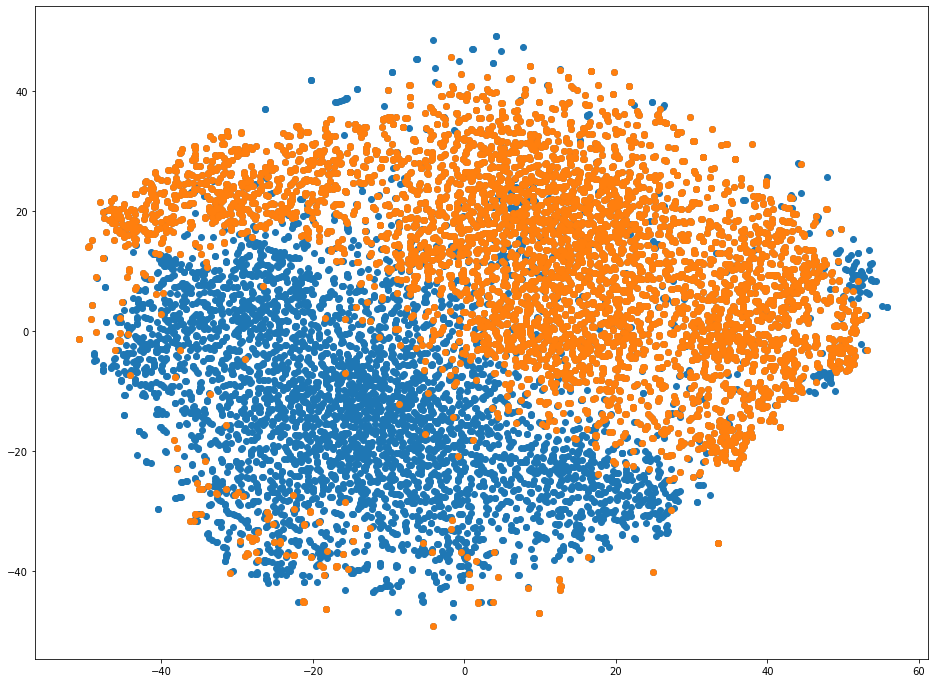

In [23]:
plt.rcParams["figure.figsize"] = (16,12)
fig, ax = plt.subplots()
ax.scatter(X_embedded[:,0], X_embedded[:,1])
ax.scatter(X_embedded[g1,0], X_embedded[g1,1], label=1)

In [26]:
pca_variance = np.sort(np.var(test, axis=0))[::-1] 

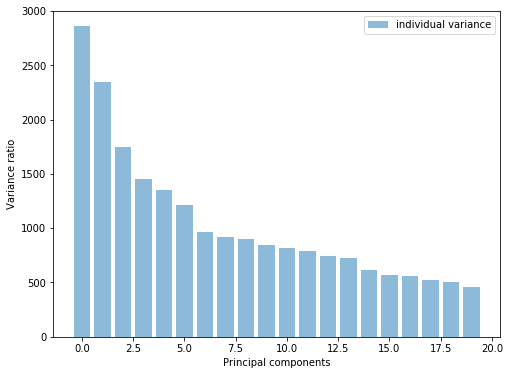

In [29]:
plt.figure(figsize=(8, 6))
plt.bar(range(20), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()